# YOLOv8 Training & Evaluation Notebook

roboflow link: https://app.roboflow.com/aut-dhses/assembly-iat-2-teil-a-b-tbbl1/models


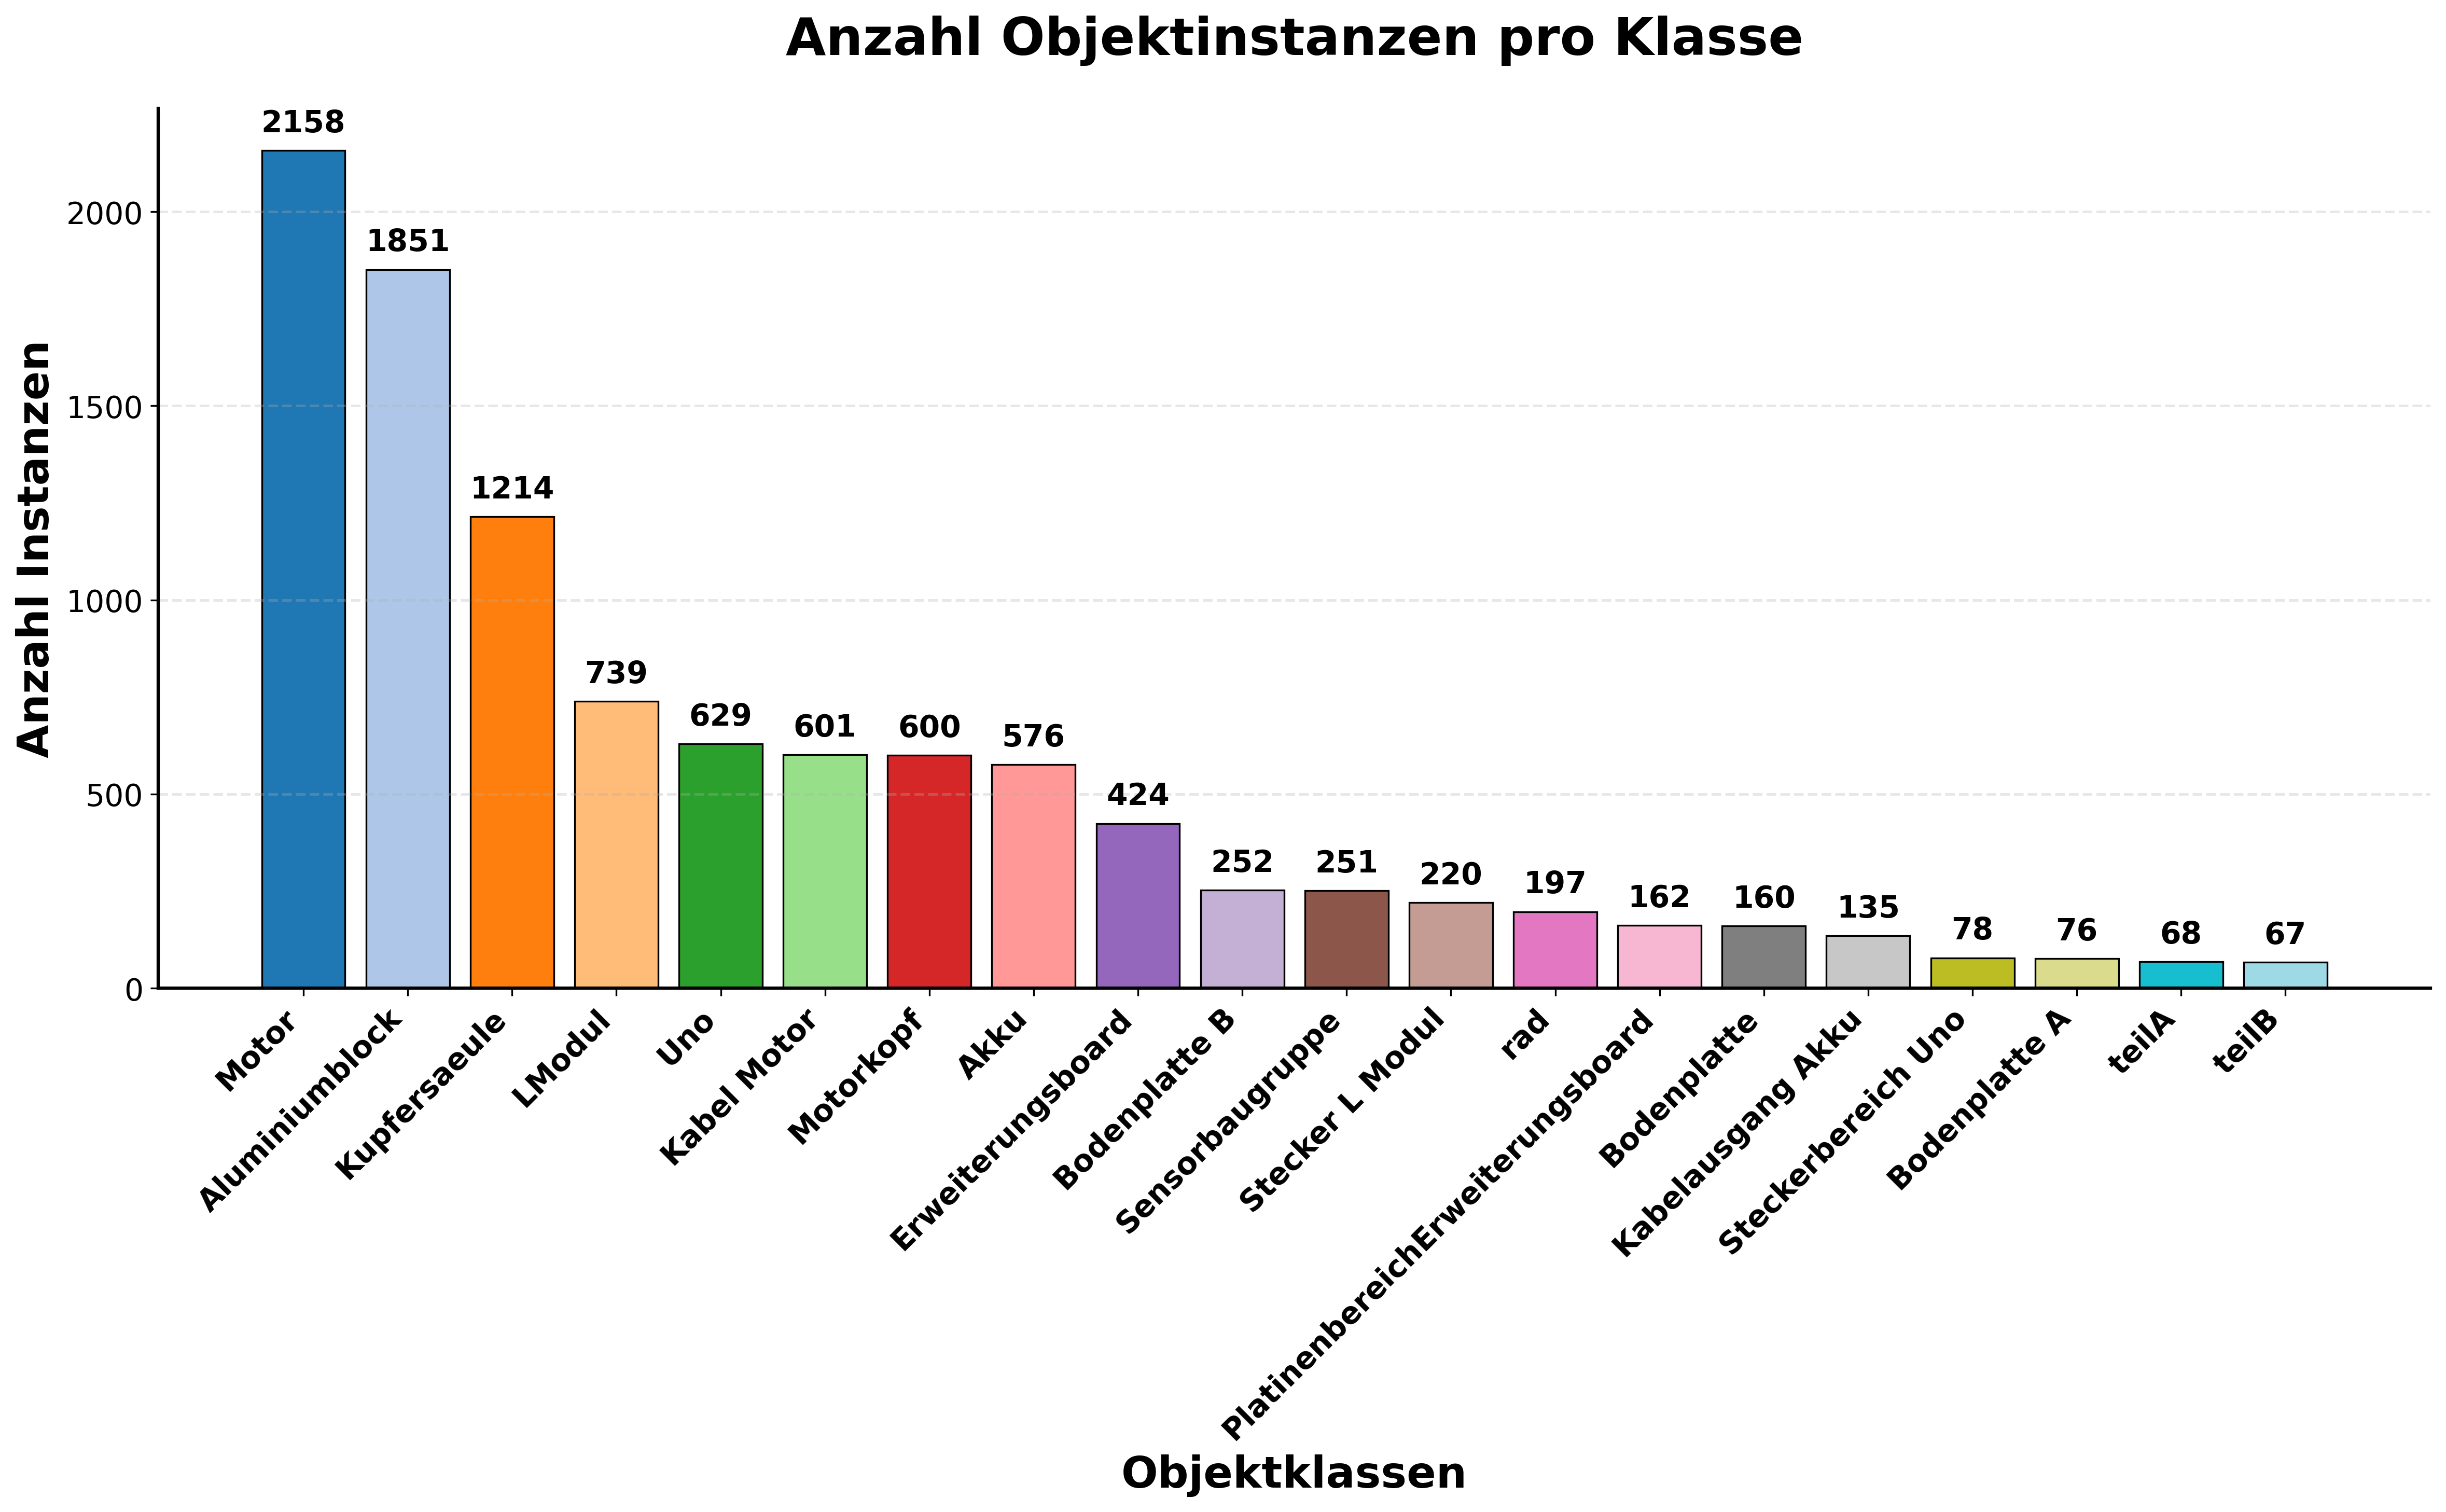

Total instances: 10458
Number of classes: 20


In [71]:
import numpy as np
import matplotlib.pyplot as plt

roboflow_data = {
    'Akku': 576,
    'Aluminiumblock': 1851,
    'Bodenplatte': 160,
    'Bodenplatte A': 76,
    'Bodenplatte B': 252,
    'Erweiterungsboard': 424,
    'Kabel Motor': 601,
    'Kabelausgang Akku': 135,
    'Kupfersaeule': 1214,
    'LModul': 739,
    'Motor': 2158,
    'Motorkopf': 600,
    'PlatinenbereichErweiterungsboard': 162,
    'rad': 197,
    'Sensorbaugruppe': 251,
    'Stecker L Modul': 220,
    'Steckerbereich Uno': 78,
    'teilA': 68,
    'teilB': 67,
    'Uno': 629
}

plt.rcParams.update({
    'font.size': 16,
    'axes.linewidth': 1.5,
    'figure.dpi': 300,
    'savefig.dpi': 300,
    'savefig.bbox': 'tight'
})

sorted_items = sorted(roboflow_data.items(), key=lambda x: x[1], reverse=True)
labels_sorted = [item[0] for item in sorted_items]
counts_sorted = [item[1] for item in sorted_items]

fig, ax = plt.subplots(figsize=(16, 10))
colors = plt.get_cmap('tab20').colors
bar_colors = [colors[i % len(colors)] for i in range(len(counts_sorted))]

bars = ax.bar(range(len(counts_sorted)), counts_sorted, color=bar_colors, edgecolor='black', linewidth=0.8)

for i, v in enumerate(counts_sorted):
    ax.text(i, v + max(counts_sorted) * 0.015, f'{int(v)}', ha='center', va='bottom', fontsize=14, fontweight='bold')

ax.set_title('Anzahl Objektinstanzen pro Klasse', fontsize=24, fontweight='bold', pad=25)
ax.set_xlabel('Objektklassen', fontsize=20, fontweight='bold')
ax.set_ylabel('Anzahl Instanzen', fontsize=20, fontweight='bold')

ax.set_xticks(range(len(labels_sorted)))
ax.set_xticklabels(labels_sorted, rotation=45, ha='right', fontsize=14, fontweight='bold')
ax.tick_params(axis='y', labelsize=14)
ax.tick_params(axis='x', labelsize=14)
ax.grid(True, axis='y', linestyle='--', alpha=0.3, linewidth=1.2)
ax.set_facecolor('white')
for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)
for spine in ['left', 'bottom']:
    ax.spines[spine].set_linewidth(1.5)

plt.tight_layout()
plt.show()

total_instances = sum(counts_sorted)
print(f"Total instances: {total_instances}")
print(f"Number of classes: {len(roboflow_data)}")



In [72]:
import os

dataset_path = r"C:\Users\kraie\Downloads\assembly IAT 2 -teil a b -.v2i.yolov11"

splits = ['train', 'valid', 'test']
total_images = 0
split_counts = {}

for split in splits:
    split_path = os.path.join(dataset_path, split)
    
    if os.path.exists(split_path):
        images_path = os.path.join(split_path, 'images')
        
        if os.path.exists(images_path):
            image_files = [f for f in os.listdir(images_path) 
                         if f.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp', '.tiff'))]
            image_count = len(image_files)
            split_counts[split] = image_count
            total_images += image_count

print("DATASET STATISTICS:")
print(f"Total images: {total_images}")
print(f"Train: {split_counts.get('train', 0)} images ({(split_counts.get('train', 0)/total_images*100):.1f}%)")
print(f"Valid: {split_counts.get('valid', 0)} images ({(split_counts.get('valid', 0)/total_images*100):.1f}%)")
print(f"Test: {split_counts.get('test', 0)} images ({(split_counts.get('test', 0)/total_images*100):.1f}%)")
print(f"Classes: 20")

DATASET STATISTICS:
Total images: 1134
Train: 798 images (70.4%)
Valid: 224 images (19.8%)
Test: 112 images (9.9%)
Classes: 20


## 1. Import Required Libraries

In [73]:
import os
from ultralytics import YOLO
import pandas as pd
import matplotlib.pyplot as plt
import torch

## 2. Configuration

Set up dataset paths and model parameters.

In [74]:
# Path to your dataset YAML (update if needed)
data_yaml_path = r"C:\Users\kraie\Downloads\assembly IAT 2 -teil a b -.v2i.yolov11\data.yaml"
# Model selection
model_name = r"C:\Users\kraie\OneDrive\Bureau\New folder (5)\best yolov8m  all inclusive.pt"


In [75]:

experiment_name = "yolo8_custom_opt"
epochs = 100
imgsz = 640
batch = 16
optimizer = "SGD"
cos_lr = True
workers = 2  # Lower for Windows, increase for Linux

## 3. Check for GPU

Training is enforced on GPU for speed and compatibility.

In [76]:
if torch.cuda.is_available():
    device = 0
    print("Using GPU for training.")
else:
    raise RuntimeError("No GPU found. GPU is required for training. Please ensure a CUDA-capable GPU is available and PyTorch is installed with CUDA support.")

Using GPU for training.


## 4. Train the YOLOv8 Model

In [77]:
from ultralytics import YOLO
from pathlib import Path

# Use the existing pre-trained model from workspace
print(f"✓ Loading pre-trained model: {model_name}")

# Load the model
model = YOLO(model_name)

# Uncomment the lines below if you want to continue training
# print("Fine-tuning the pre-trained model...")
# model.train(
#     data=r"C:\Users\kraie\Downloads\assembly IAT 2 -teil a b -.v2i.yolov11\data.yaml",
#     epochs=50,  # Reduced epochs for fine-tuning
#     patience=20,
#     imgsz=640,
#     batch=16,
#     name="yolo8_custom_opt_finetune",
#     device=0,
#     # Augmentation parameters
#     mosaic=1.0,         # Enable mosaic augmentation
#     mixup=0.5,          # Enable mixup augmentation
#     flipud=0.5,         # Vertical flip probability
#     fliplr=0.5,         # Horizontal flip probability
#     hsv_h=0.015,        # HSV hue augmentation
#     hsv_s=0.7,          # HSV saturation augmentation
#     hsv_v=0.4,          # HSV value augmentation
#     scale=0.5,          # Image scaling
#     degrees=10.0,       # Random rotation
#     shear=2.0,          # Shear augmentation
#     perspective=0.0     # Perspective augmentation
# )

✓ Loading pre-trained model: C:\Users\kraie\OneDrive\Bureau\New folder (5)\best yolov8m  all inclusive.pt


## 5. Validate the Model

Evaluate the trained model on the validation set and print metrics.

In [78]:
metrics = model.val()
print("Validation metrics:", metrics)

Ultralytics 8.3.144  Python-3.12.0 torch-2.5.1+cu118 CUDA:0 (NVIDIA GeForce RTX 3070 Ti, 8192MiB)
Model summary (fused): 92 layers, 25,851,340 parameters, 0 gradients, 78.7 GFLOPs
Model summary (fused): 92 layers, 25,851,340 parameters, 0 gradients, 78.7 GFLOPs
val: Fast image access  (ping: 0.00.0 ms, read: 713.3123.7 MB/s, size: 74.2 KB)
val: Fast image access  (ping: 0.00.0 ms, read: 713.3123.7 MB/s, size: 74.2 KB)


val: Scanning C:\Users\kraie\Downloads\assembly IAT 2 -teil a b -.v2i.yolov11\valid\labels.cache... 224 images, 11 backgrounds, 0 corrupt: 100%|██████████| 224/224 [00:00<?, ?it/s]

WARNING Box and segment counts should be equal, but got len(segments) = 901, len(boxes) = 1823. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  3.69it/s]



                   all        224       1823       0.94      0.961      0.972      0.817
                  Akku         96        106      0.931      0.943       0.97      0.864
        Aluminiumblock        132        319      0.907      0.889      0.937      0.611
           Bodenplatte         24         32      0.981          1      0.995      0.988
         Bodenplatte A          8         16      0.964          1      0.995      0.861
         Bodenplatte B         48         48      0.969          1      0.989      0.843
     Erweiterungsboard         70         70      0.965      0.986      0.988      0.908
           Kabel Motor         41        112      0.951          1      0.995      0.799
     Kabelausgang Akku         27         27      0.984          1      0.995      0.527
          Kupfersaeule         49        204      0.937      0.824      0.909      0.512
                LModul        115        125      0.953      0.976      0.956      0.866
                 Moto

## 6. Inference on a Sample Image
Run inference on a sample image from the test set to visually inspect predictions.

In [79]:
sample_path = os.path.join(os.path.dirname(data_yaml_path), "test", "images")
sample_images = [f for f in os.listdir(sample_path) if f.endswith((".jpg", ".png"))]
if sample_images:
    sample_img = os.path.join(sample_path, sample_images[0])
    results = model(sample_img)
    results[0].show()
else:
    print("No sample images found for inference.")

image 1/1 C:\Users\kraie\Downloads\assembly IAT 2 -teil a b -.v2i.yolov11\test\images\10_0031t_png.rf.39497d76795b056027c141aa7792f2d8.jpg: 320x640 2 Bodenplattes, 2 Bodenplatte As, 1 Bodenplatte B, 29.4ms
Speed: 6.3ms preprocess, 29.4ms inference, 4.9ms postprocess per image at shape (1, 3, 320, 640)
Speed: 6.3ms preprocess, 29.4ms inference, 4.9ms postprocess per image at shape (1, 3, 320, 640)


## 7. Visualize Training Metrics

Plot mAP, precision, recall, and loss curves from the training run.

✓ Training metrics saved to latex doku/Figures/training_metrics.png


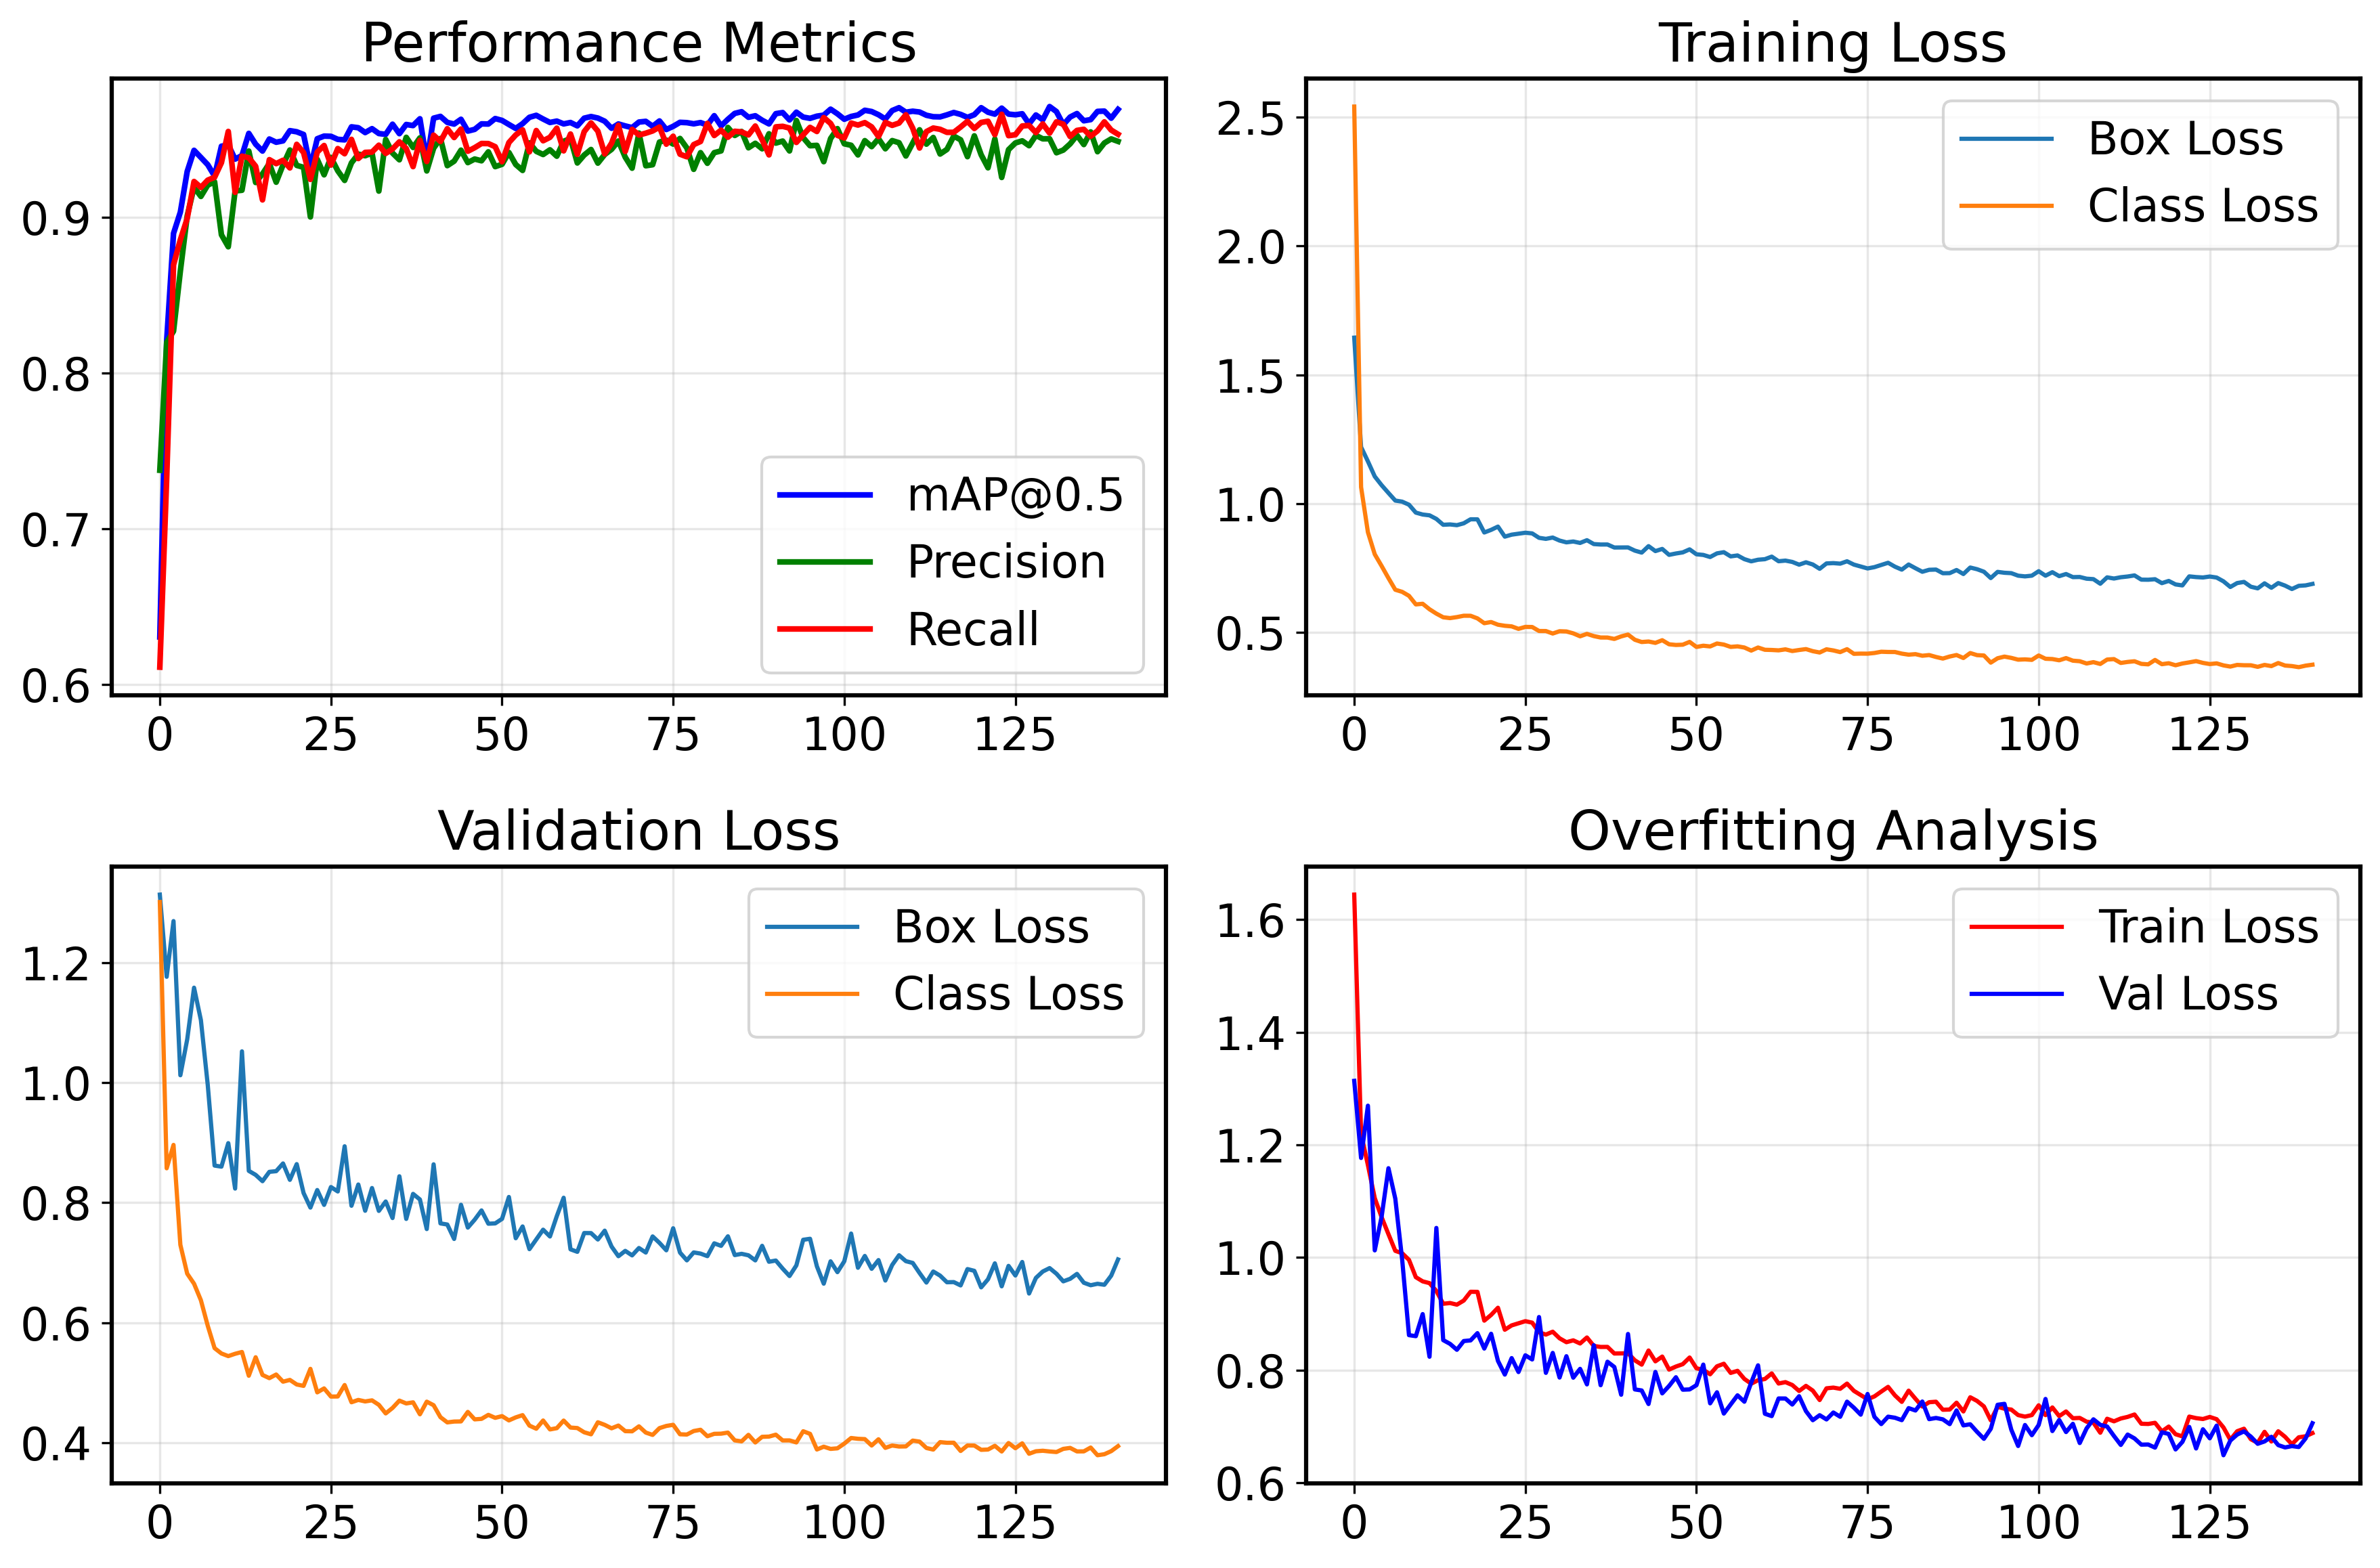

Final mAP@0.5: 0.9694
Final Precision: 0.9488
Final Recall: 0.9534


In [81]:
# Load and visualize training metrics
%matplotlib inline
import matplotlib.pyplot as plt
from pathlib import Path

# Load results CSV directly from workspace
metrics_csv = Path("results.csv")
df = pd.read_csv(metrics_csv, skipinitialspace=True)
df.columns = df.columns.str.strip()

# Create plots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Performance metrics
axes[0,0].plot(df.index, df['metrics/mAP50(B)'], 'b-', linewidth=2, label='mAP@0.5')
axes[0,0].plot(df.index, df['metrics/precision(B)'], 'g-', linewidth=2, label='Precision')
axes[0,0].plot(df.index, df['metrics/recall(B)'], 'r-', linewidth=2, label='Recall')
axes[0,0].set_title('Performance Metrics')
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)

# Training loss
axes[0,1].plot(df.index, df['train/box_loss'], label='Box Loss')
axes[0,1].plot(df.index, df['train/cls_loss'], label='Class Loss')
axes[0,1].set_title('Training Loss')
axes[0,1].legend()
axes[0,1].grid(True, alpha=0.3)

# Validation loss
axes[1,0].plot(df.index, df['val/box_loss'], label='Box Loss')
axes[1,0].plot(df.index, df['val/cls_loss'], label='Class Loss')
axes[1,0].set_title('Validation Loss')
axes[1,0].legend()
axes[1,0].grid(True, alpha=0.3)

# Overfitting check
axes[1,1].plot(df.index, df['train/box_loss'], 'r-', label='Train Loss')
axes[1,1].plot(df.index, df['val/box_loss'], 'b-', label='Val Loss')
axes[1,1].set_title('Overfitting Analysis')
axes[1,1].legend()
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()

# Save to latex figures directory
plt.savefig("training_metrics.png", dpi=300, bbox_inches='tight')
print("✓ Training metrics saved to latex doku/Figures/training_metrics.png")

plt.show()

# Summary
print(f"Final mAP@0.5: {df['metrics/mAP50(B)'].iloc[-1]:.4f}")
print(f"Final Precision: {df['metrics/precision(B)'].iloc[-1]:.4f}")
print(f"Final Recall: {df['metrics/recall(B)'].iloc[-1]:.4f}")


**Tip:** After each experiment, compare your metrics and loss curves to see what works best for your dataset and task.

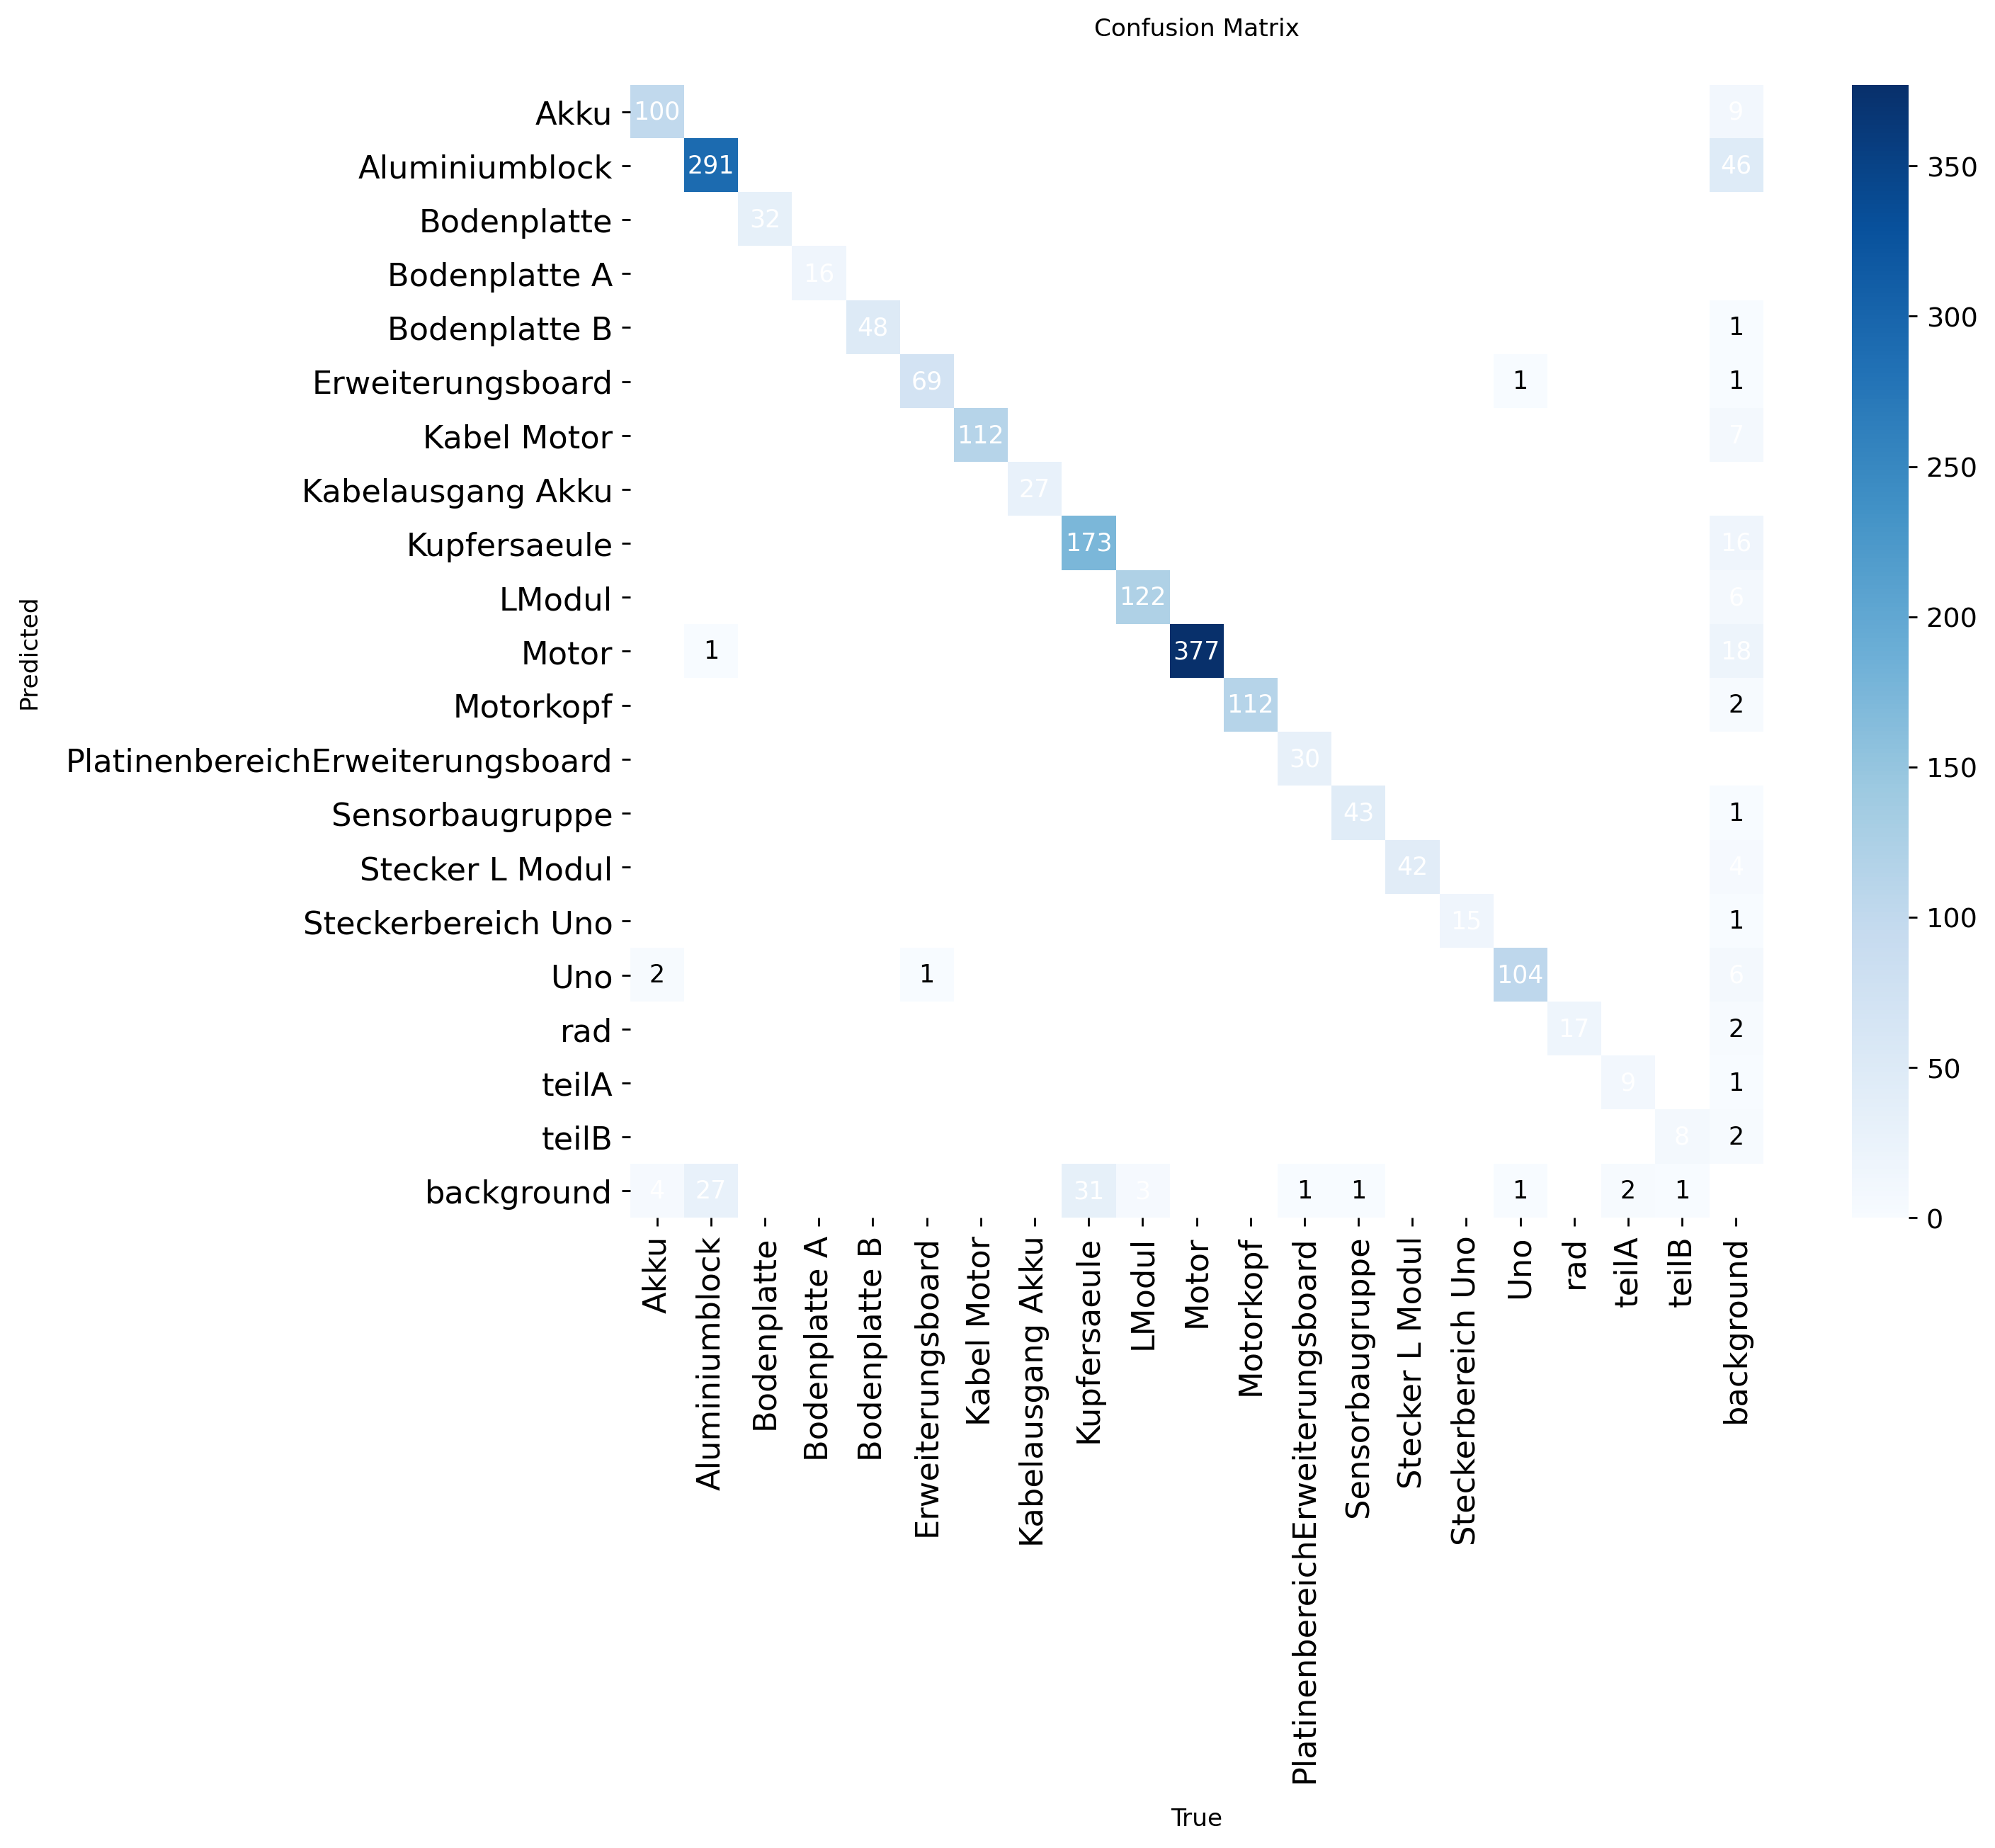

In [ ]:
# Confusion Matrix
from PIL import Image
from pathlib import Path

# Load and display confusion matrix
cm_path = Path("runs/detect/val/confusion_matrix.png")
cm_img = Image.open(cm_path)
cm_img


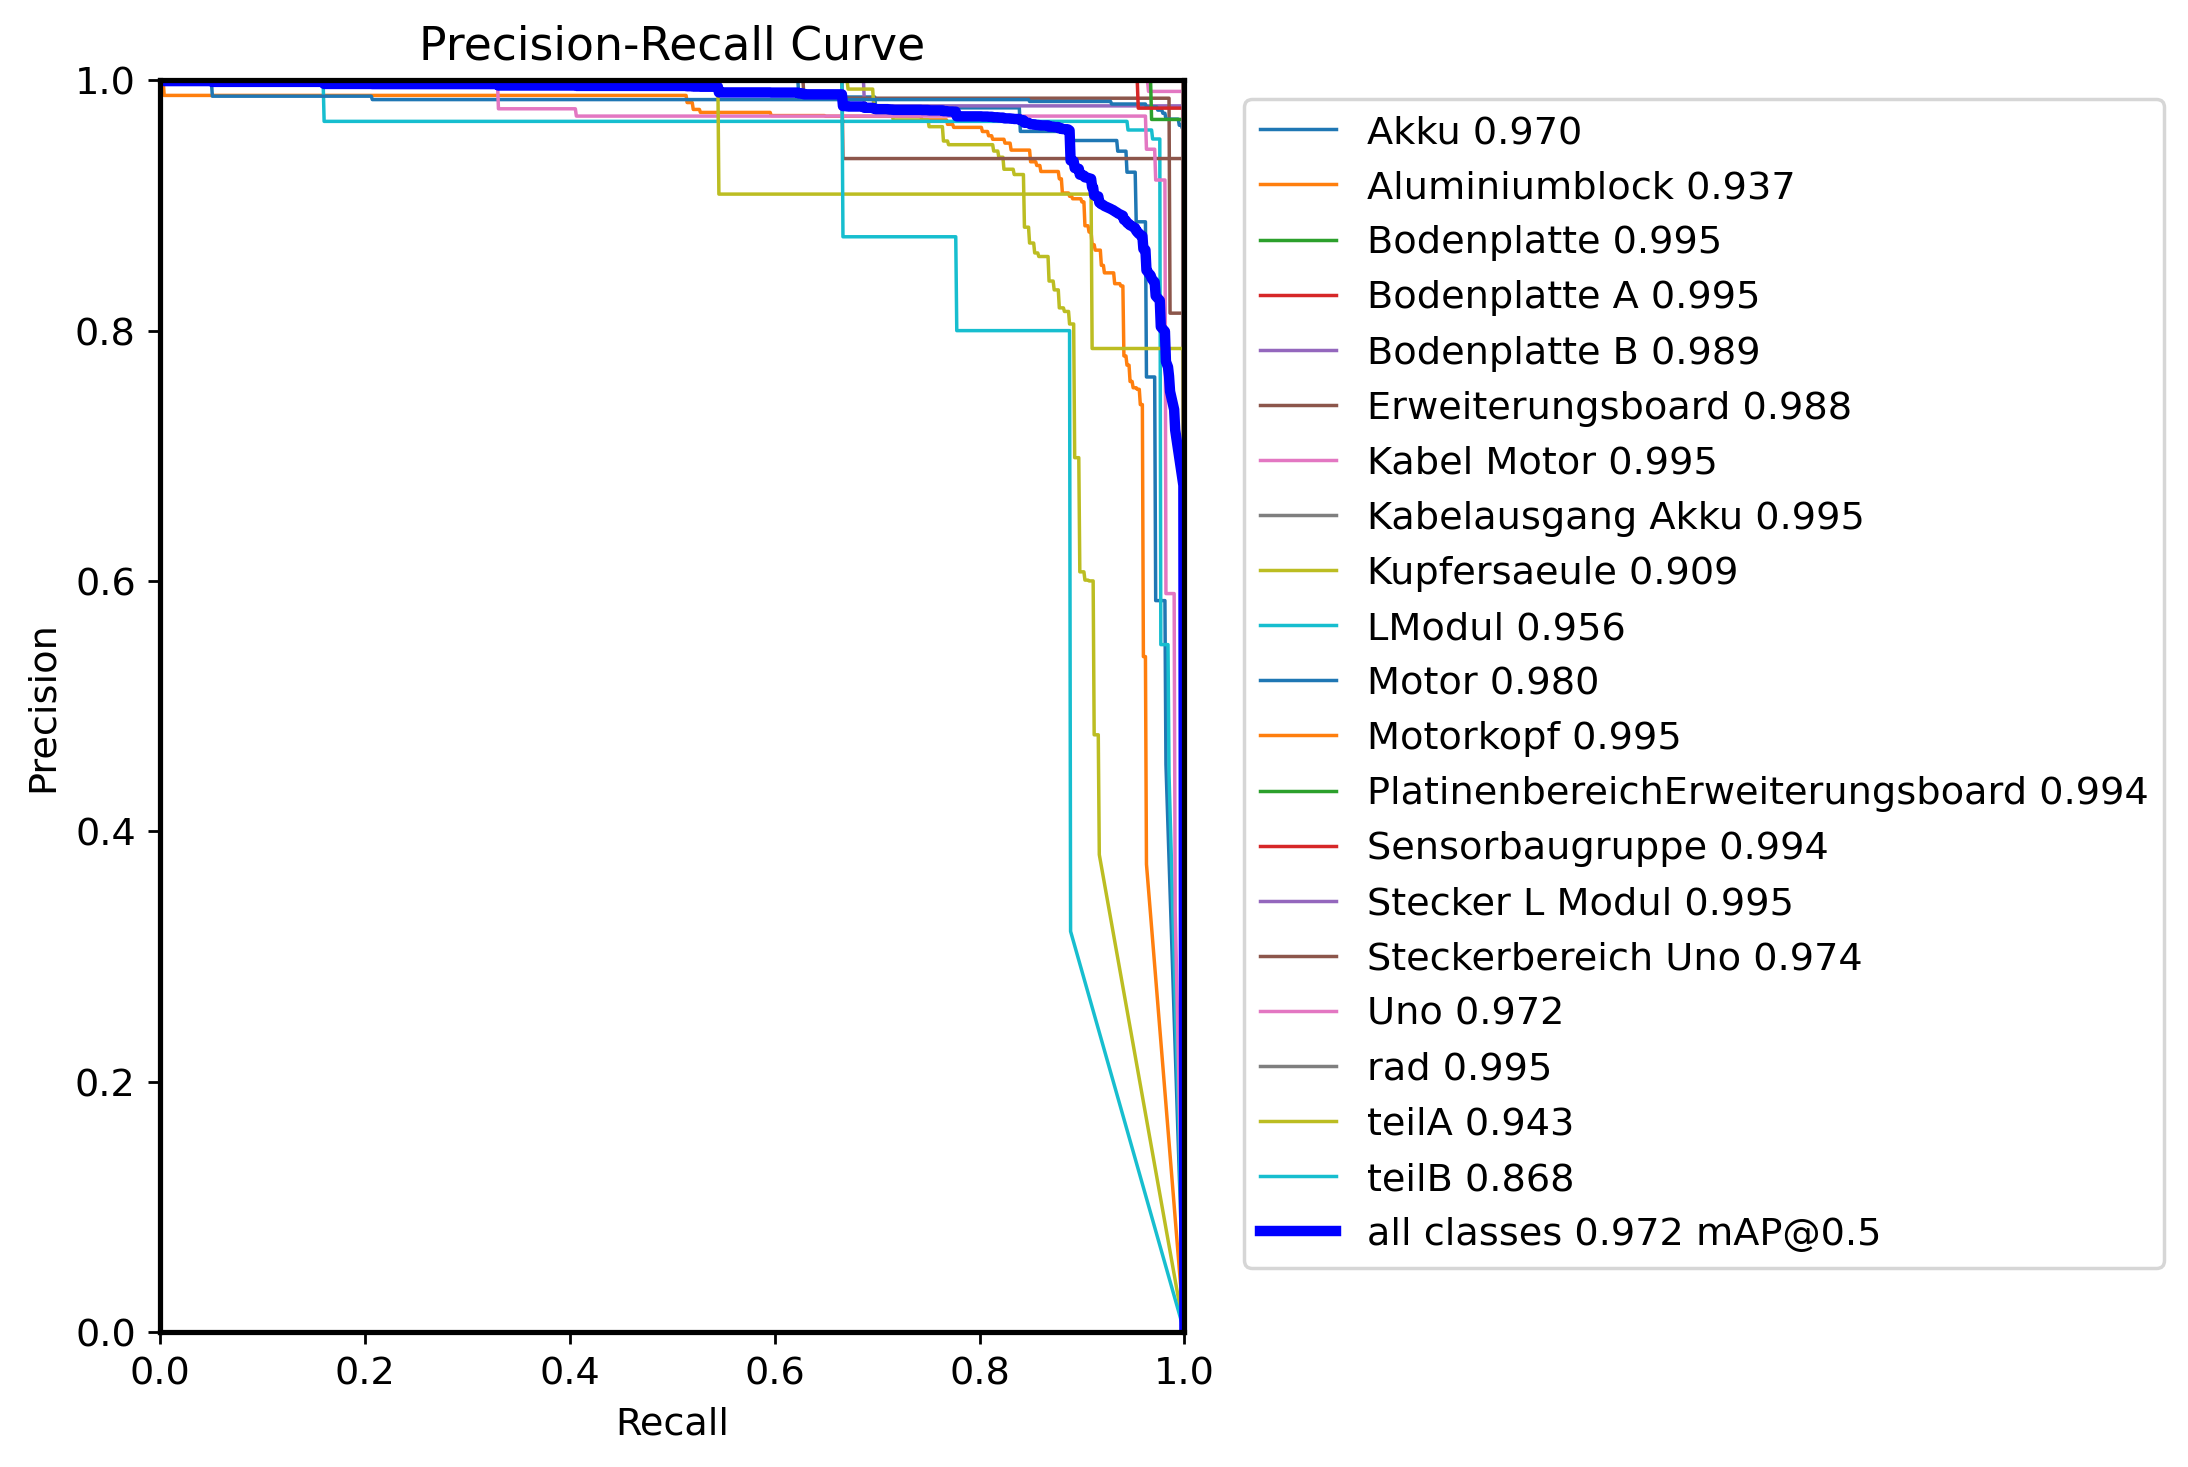

In [ ]:
# PR Curve
from PIL import Image
from pathlib import Path

# Load and display PR curve
pr_path = Path("runs/detect/val/PR_curve.png")
pr_img = Image.open(pr_path)
pr_img

In [ ]:
# Model Export - using the loaded pre-trained model
# Path(model_name).exists():
#    export_model = YOLO(model_name)
#    export_model.export(format='tensorrt')
